In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('bank-full.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [5]:
data.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no null values in any of the column

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Looking at the age column, data looks representative of the true age distribution of the adult population


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The data has 45211 instances with 17 attributes. 7 integer type and 10 object type. 

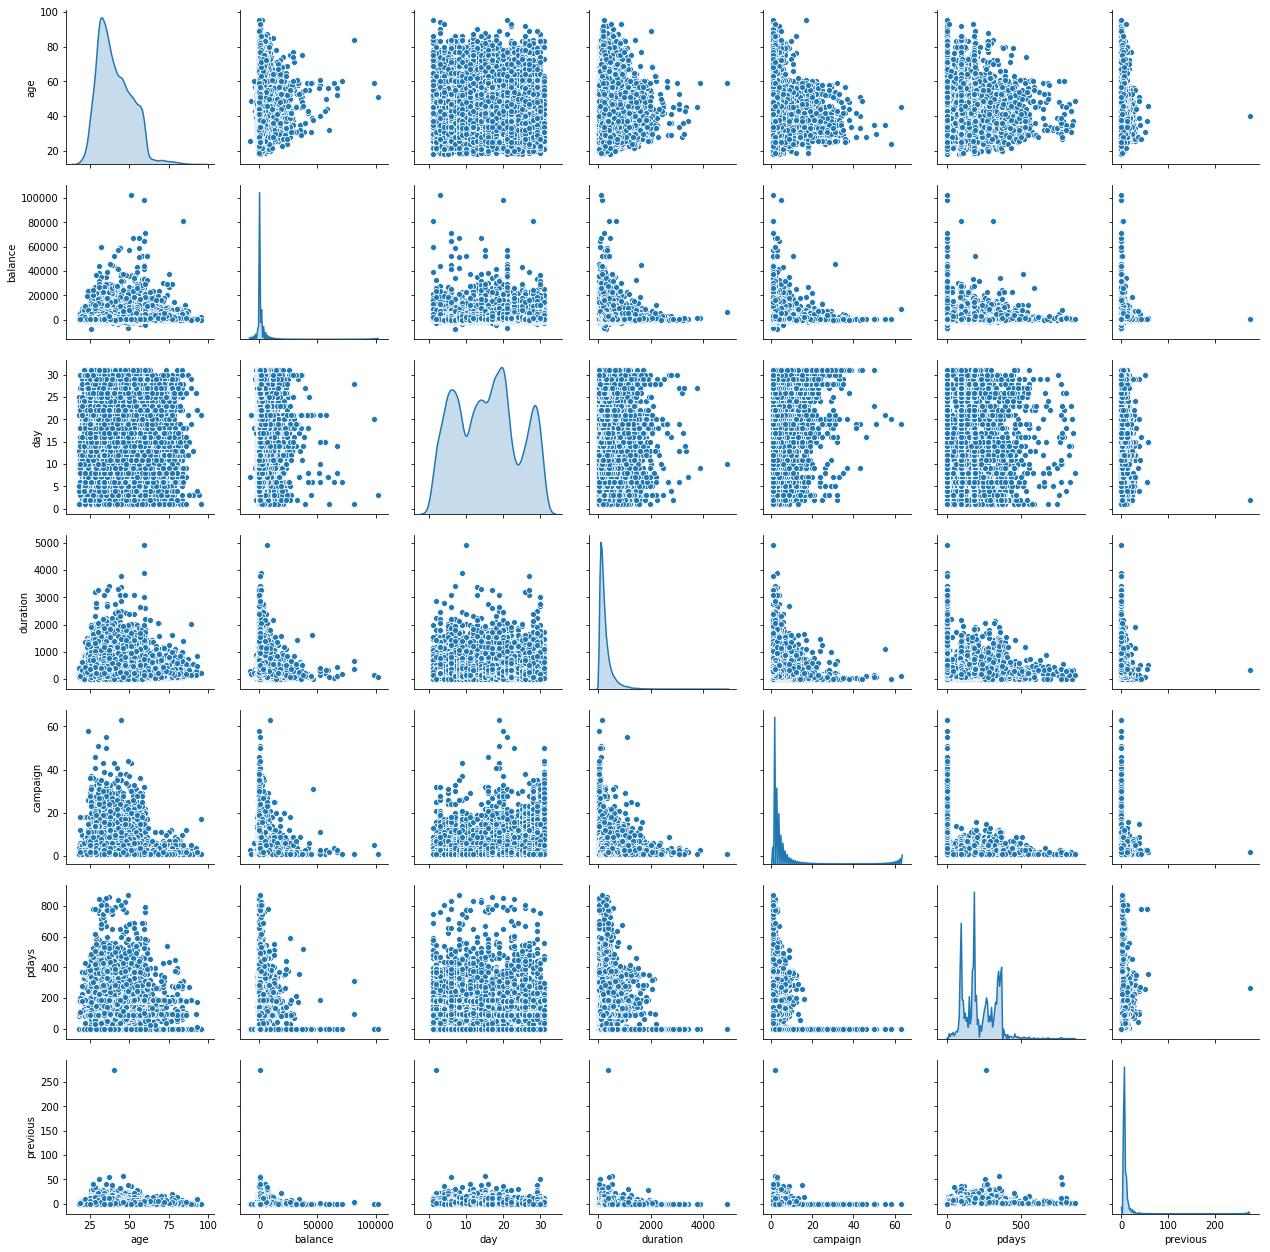

In [9]:
sns.pairplot(data , diag_kind = 'kde')

In [10]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [11]:
data["Target"] = data["Target"].astype('category')
data.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
Target       category
dtype: object

In [12]:
data["y"] = data["Target"].cat.codes
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [13]:
data['y'].nunique()

2

In [14]:
data.drop('Target',axis =1,inplace = True)

In [15]:
data[['job', 'y']].groupby("job").mean().reset_index()

,job,y
0,admin.,0.122027
1,blue-collar,0.072750
2,entrepreneur,0.082717
3,housemaid,0.087903
4,management,0.137556
5,retired,0.227915
6,self-employed,0.118429
7,services,0.088830
8,student,0.286780
9,technician,0.110570


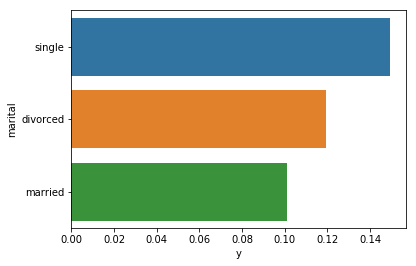

In [16]:
d1 = data[['marital', 'y']].groupby("marital").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "marital", x = 'y',data = d1)

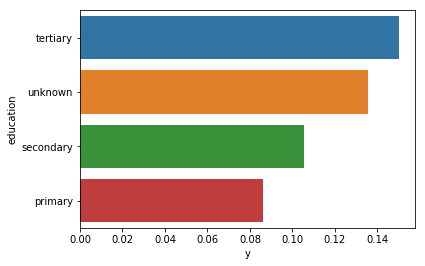

In [17]:
d1 = data[['education', 'y']].groupby("education").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "education", x = 'y',data = d1)

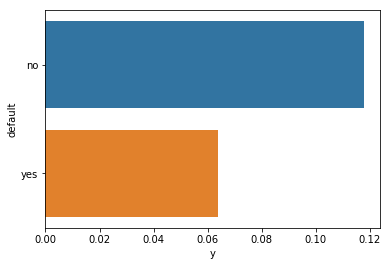

In [18]:
d1 = data[['default', 'y']].groupby("default").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "default", x = 'y',data = d1)

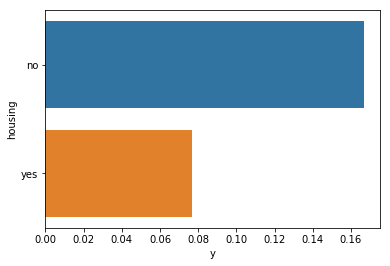

In [19]:
d1 = data[['housing', 'y']].groupby("housing").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "housing", x = 'y',data = d1)

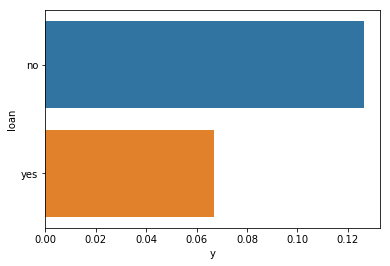

In [20]:
d1 = data[['loan', 'y']].groupby("loan").mean().reset_index().sort_values("y", ascending=False)
sns.barplot(y = "loan", x = 'y',data = d1)

In [21]:
summary = data.groupby("y")
summary.mean().reset_index()

,y,age,balance,day,duration,campaign,pdays,previous
0,0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Observations:

Average balance of subscribers for term deposit is more than non subscribers
Average duration of call is also more more those with y = 1
Average number of days passed since last contact(pdays) is also high for those with y = 1.

In [22]:
pd.DataFrame(abs(data.corr()['y']).reset_index().sort_values('y',ascending = False))

,index,y
7,y,1.000000
3,duration,0.394521
5,pdays,0.103621
6,previous,0.093236
4,campaign,0.073172
1,balance,0.052838
2,day,0.028348
0,age,0.025155


Duration is the most corelated feature with y

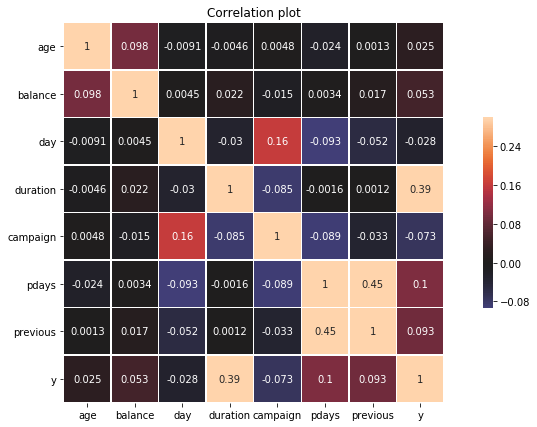

In [23]:
corr = data.corr()
plt.figure(figsize=(14,7))
plt.title("Correlation plot")
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

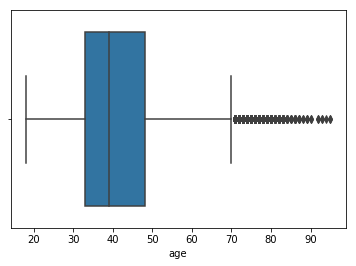

In [24]:
sns.boxplot(x=data['age'])

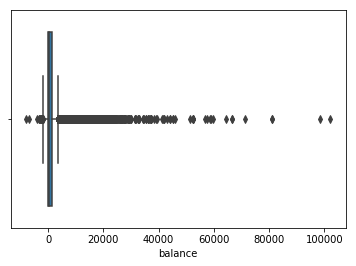

In [25]:
sns.boxplot(x=data['balance'])

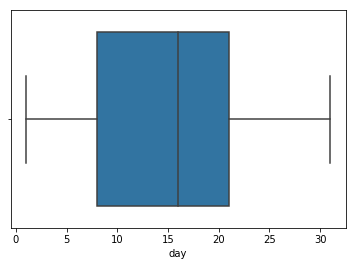

In [26]:
sns.boxplot(x=data['day'])

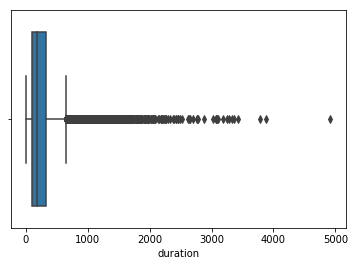

In [27]:
sns.boxplot(x=data['duration'])

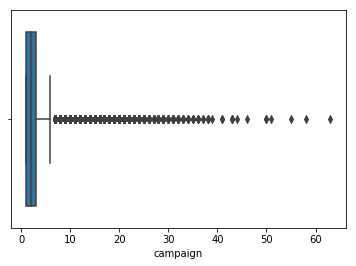

In [28]:
sns.boxplot(x=data['campaign'])

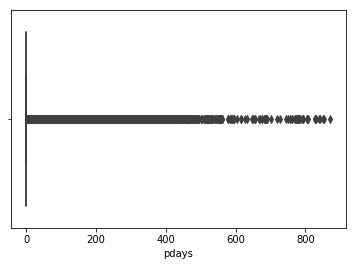

In [29]:
sns.boxplot(x=data['pdays'])

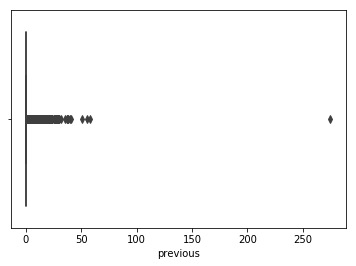

In [30]:
sns.boxplot(x=data['previous'])

To collect no.of outliers.

In [31]:
num_data = data.select_dtypes(['int64'])  
num_data.head()


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [32]:
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [33]:
d = ((num_data<(Q1 - 1.5*IQR)) | (num_data>(Q3 + 1.5*IQR))).sum()

In [34]:
print(d)

age          487
balance     4729
day            0
duration    3235
campaign    3064
pdays       8257
previous    8257
dtype: int64


No.of outliers in the dataframe

In [35]:
d2 = data

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if(d2[col].dtype == 'object'):
        d2.loc[:,col] = le.fit_transform(d2.loc[:,col])

In [37]:
d2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [38]:
d2.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y             int8
dtype: object

In [39]:
X = d2.iloc[:,:-1].values
y = d2.iloc[:,-1].values

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [41]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed, n_jobs=-1)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())


0.8649642373626012


In [42]:
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True)

bgcl = bgcl.fit(X, y)
print(bgcl.oob_score_)

0.9049788768220124


In [43]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, n_jobs=-1)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.8842298229668006


In [44]:
rfcl = RandomForestClassifier(n_estimators = 10)
rfcl = rfcl.fit(x_train, y_train)
test_pred = rfcl.predict(x_test)
rfcl.score(x_test , y_test)

0.9018726039516367

The no of estimators is increased the score of Random Forest Classifier increases.

In [45]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold, n_jobs=-1)
print(results.mean())

0.8833450531751135


In [46]:
abcl = AdaBoostClassifier(base_estimator=cart, n_estimators=10)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(x_train, y_train)
abc_pred = abcl.predict(x_test)
abcl.score(x_test , y_test)

0.8712031849012091

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [48]:
model = LogisticRegression(solver='lbfgs', max_iter = 1000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.8893394278973754
[[11743   270]
 [ 1231   320]]


C:\Users\jaggu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [49]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)
predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.8828516661751695

In [50]:
NNH1 = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH1.fit(x_train, y_train)
predicted_labels = NNH1.predict(x_test)
NNH1.score(x_test, y_test)

0.8771011501032144

In [51]:
NNH2 = KNeighborsClassifier(n_neighbors= 20 , weights = 'distance' )
NNH2.fit(x_train, y_train)
predicted_labels = NNH2.predict(x_test)
NNH2.score(x_test, y_test)

0.8892657033323503

# Observation : In KNN method as the number of 'n' is increased the score increases as in the case of Logestic Regression


# Ensemble has slightly higher score than standard classifiers 